# Predicting Employee Attrition With Machine Learning in R

## Prepared by

Author: Shinin Varongchayakul

Date: 07 Apr 2025

Language: R

## Dataset

Name: IBM HR Analytics Employee Attrition & Performance

Source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Business Problem
- A company was experiencing employee attrition, losing key talents, productivity, and employee engagement.
- The company wanted to understand factors related to attrition and how to predict attrition so that they may take steps to prevent their talents from leaving.

## Objectives of the Present Analysis
Given the business problem, the goals of the present analysis are twofolds:
1. Explore the pattern of attrition in related to employee and job characteristics.
2. Build a machine learning model to predict employee attrition.

## Analysis Steps
1. Install and load necessary packages
2. Prepare the dataset
3. Exploratory data analysis (EDA)
4. Building a machine learning model
5. Summary and recommendations

## 1. Install & Load Necessary Packages

In [ ]:
# Install packages
install.packages("tidyverse") # data manipulation
install.packages("effsize") # effect size calculation
install.packages("ggcorrplot") # correlation matrix
install.packages("tidymodels") # machine learning
install.packages("vip") # feature importance in ML models
install.packages("pdp") # plotting partial dependencies

Installing package into 'C:/Users/sam_h/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sam_h\AppData\Local\Temp\RtmpgN9iUT\downloaded_packages


Installing package into 'C:/Users/sam_h/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'effsize' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sam_h\AppData\Local\Temp\RtmpgN9iUT\downloaded_packages


Installing package into 'C:/Users/sam_h/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sam_h\AppData\Local\Temp\RtmpgN9iUT\downloaded_packages


Installing package into 'C:/Users/sam_h/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidymodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sam_h\AppData\Local\Temp\RtmpgN9iUT\downloaded_packages


Installing package into 'C:/Users/sam_h/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'vip' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sam_h\AppData\Local\Temp\RtmpgN9iUT\downloaded_packages


Installing package into 'C:/Users/sam_h/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'pdp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pdp'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\sam_h\AppData\Local\R\win-library\4.4\00LOCK\pdp\libs\x64\pdp.dll to C:\Users\sam_h\AppData\Local\R\win-library\4.4\pdp\libs\x64\pdp.dll: Permission denied"
Warning message:
"restored 'pdp'"



The downloaded binary packages are in
	C:\Users\sam_h\AppData\Local\Temp\RtmpgN9iUT\downloaded_packages


In [2]:
# Load packages
library(tidyverse)
library(effsize)
library(ggcorrplot)
library(tidymodels)
library(vip)
library(pdp)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.2.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 2. Prepare the Dataset

### 2.1 Load & Preview

In [3]:
# Load the dataset
hr <- read.csv("hr_employee_attrition_dataset.csv")

In [4]:
# Preview the first 6 rows
head(hr)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


In [5]:
# View the structure
glimpse(hr)

Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <chr> "Yes", "No", "Yes", "No", "No", "No", "No", "…
$ BusinessTravel           <chr> "Travel_Rarely", "Travel_Frequently", "Travel…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <chr> "Sales", "Research & Development", "Research …
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <chr> "Life Sciences", "Life Sciences", "Other", "L…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <chr> "Female", "Male", "Male", "Female", "Male", "…
$ HourlyRate    

### 2.2 Explore & Clean the Data

In [11]:
# Convert categorical variables to factor

## Define categorical variables
cat_vars <- c("Attrition", "BusinessTravel", "Department",
              "Education", "EducationField", "Gender",
              "JobLevel", "JobRole", "MaritalStatus",
              "Over18", "OverTime", "StockOptionLevel")

## Convert to factor
hr_cleaned <- hr |>
  
  ### Mutate across
  mutate(across(all_of(cat_vars), as.factor))

## Set attrition factor levels
hr_cleaned$Attrition <- factor(hr_cleaned$Attrition,
                               levels = c("Yes", "No"))

## Check the results
glimpse(hr_cleaned)


Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <fct> Yes, No, Yes, No, No, No, No, No, No, No, No,…
$ BusinessTravel           <fct> Travel_Rarely, Travel_Frequently, Travel_Rare…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <fct> Sales, Research & Development, Research & Dev…
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <fct> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <fct> Life Sciences, Life Sciences, Other, Life Sci…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <fct> Female, Male, Male, Female, Male, Male, Femal…
$ HourlyRate    

Comment: The categorical columns are successfully converted to `factor`.

In [12]:
# Handle missing values

## Check for missing values
anyNA(hr_cleaned)

[1] FALSE

Comment: There are no missing values in this dataset.

In [13]:
# Summarise the attrition rate
hr_cleaned |>
  
  ## Group and count by attrition
  count(Attrition, name = "Count") |>
  
  ## Compute percentage
  mutate(Percent = round(Count / sum(Count) * 100, 2))

Attrition,Count,Percent
<fct>,<int>,<dbl>
Yes,237,16.12
No,1233,83.88


Comment: The outcome has class imbalance where the positive class makes up around 1/4 of the observations.

# 3. Exploratory Data Analysis (EDA)

### 3.1 Part I – Overview

Warning message in cor(select(mutate(hr_cleaned, AttritionEncoded = if_else(Attrition == :
"the standard deviation is zero"


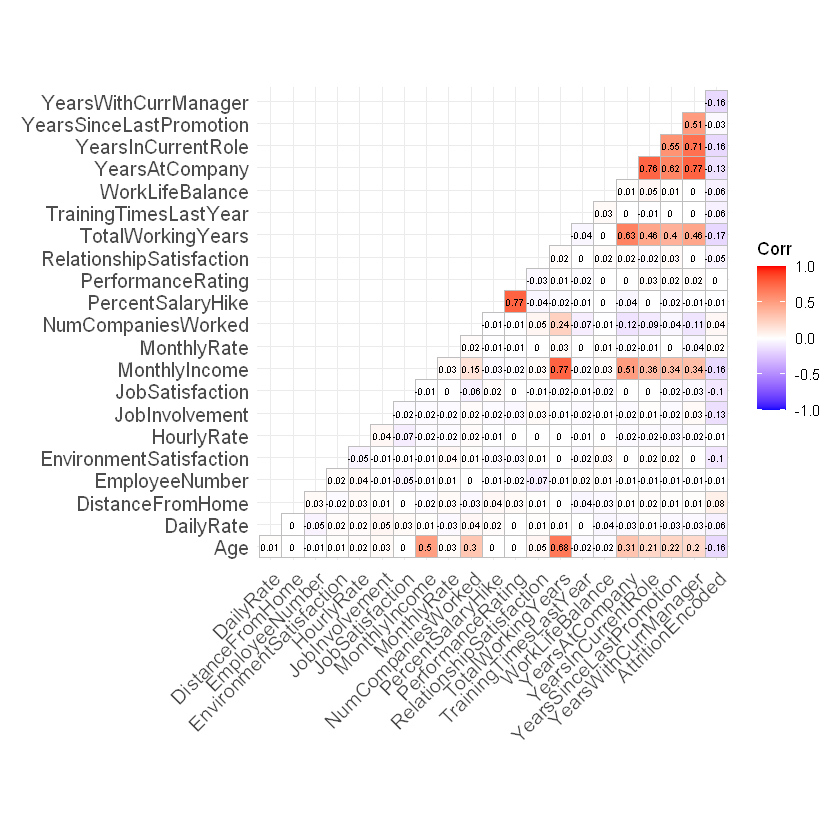

In [15]:
# Get an overview of the relationships in the data
hr_cleaned |>
  
  ## Encode attrition to numeric
  mutate(AttritionEncoded = if_else(Attrition == "Yes", 1, 0)) |>
  
  ## Select only numeric variables
  select(where(is.numeric)) |>
  
  ## Create a correlation matrix
  cor(use = "complete.obs") |>
  
  ## Visualise the correlation matrix
  ggcorrplot(lab = TRUE,
             type = "lower",
             colors = c("blue", "white", "red"),
             lab_size = 2.0)

Comments:
- All correlations between attrition and other variables are low (min = 0; max = 0.17).
- This suggests that attrition may be a result of a combination of several factors rather than any single factor alone.

### 3.2 Part II - The Three Likely Predictors

Explore 3 factors that are likely to contribute to attrition:
1. **Monlthy income:** employees may leave due to insufficient financial incentive, where lower income associated with higher attrition rate.
2. **Overtime:** employees may leave because of workload, where those with more overtime more likely to leave.
3. **Environment satisfaction:** those unsatisfied with their workplace conditions may be more likely to leave.

#### 3.2.1 Factor 1 – Monthly Income

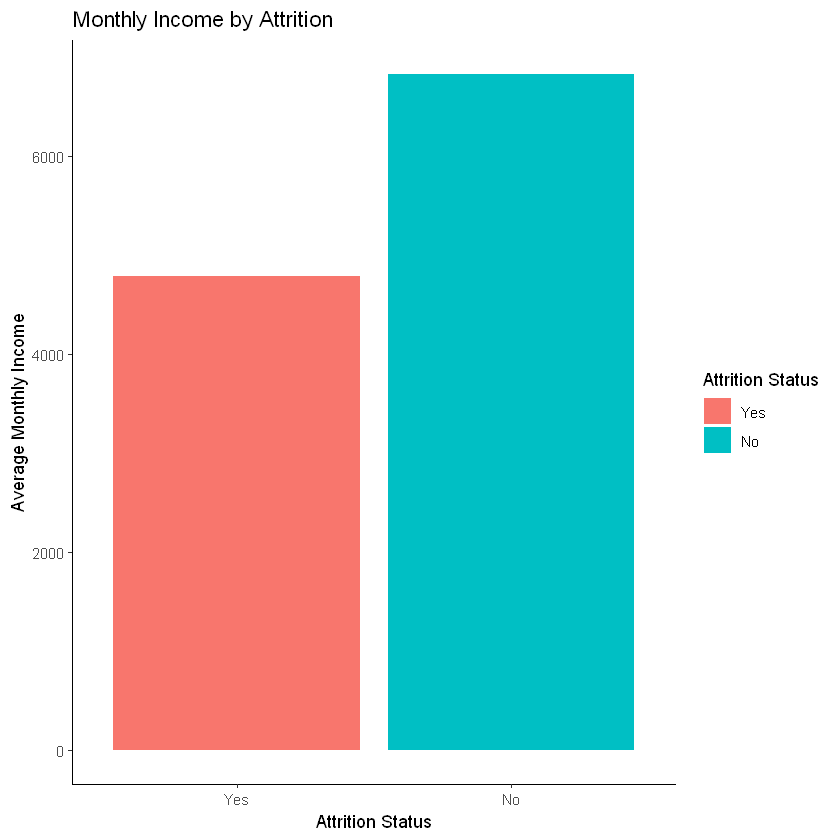

In [16]:
# 1. Monlthy income vs attrition
hr_cleaned |>
  
  ## Group by attrition
  group_by(Attrition) |>
  
  ## Summarise
  summarise(AVGMonthlyIncome = mean(MonthlyIncome)) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Attrition,
             y = AVGMonthlyIncome,
             fill = Attrition)) +
  
  ## Call bar plot
  geom_col() +
  
  ## Add text elements
  labs(title = "Monthly Income by Attrition",
       x = "Attrition Status",
       y = "Average Monthly Income",
       fill = "Attrition Status") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Change theme to classic for easy viewing
  theme_classic()

Comments:
- On average, those who stayed appear to earn more than those who left.
- This suggests that monthly income is a contributing factor to attrition.

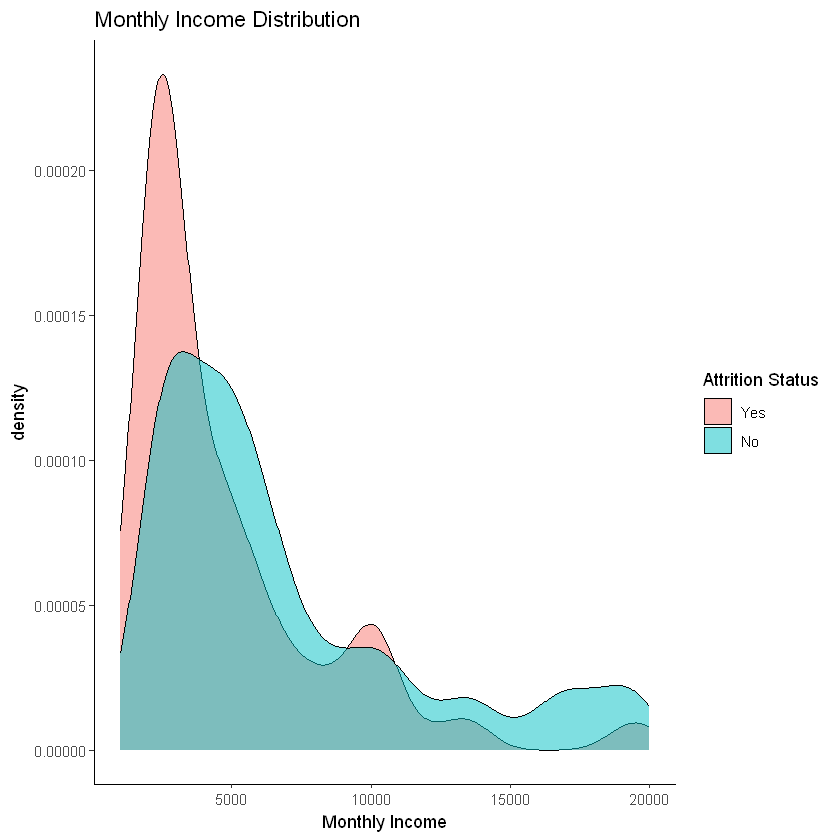

In [17]:
# Check the distribution of monthly income
hr_cleaned |>
  
  ## Aesthetic mapping
  ggplot(aes(x = MonthlyIncome,
             fill = Attrition)) +
  
  ## Call density plot
  geom_density(alpha = 0.5) +
  
  ## Add text elements
  labs(title = "Monthly Income Distribution",
       x = "Monthly Income",
       fill = "Attrition Status") +
  
  ## Change theme to classic for easy viewing
  theme_classic()

Comments:
- The distributions of both attrition groups are positively skewed.
- There are more proportionally more people who left in the lower end of the monthly income distribution.
- This adds further support to the earlier analysis that monthly income is a contributor of attrition.

#### 3.2.2 Factor 2 – Overtime

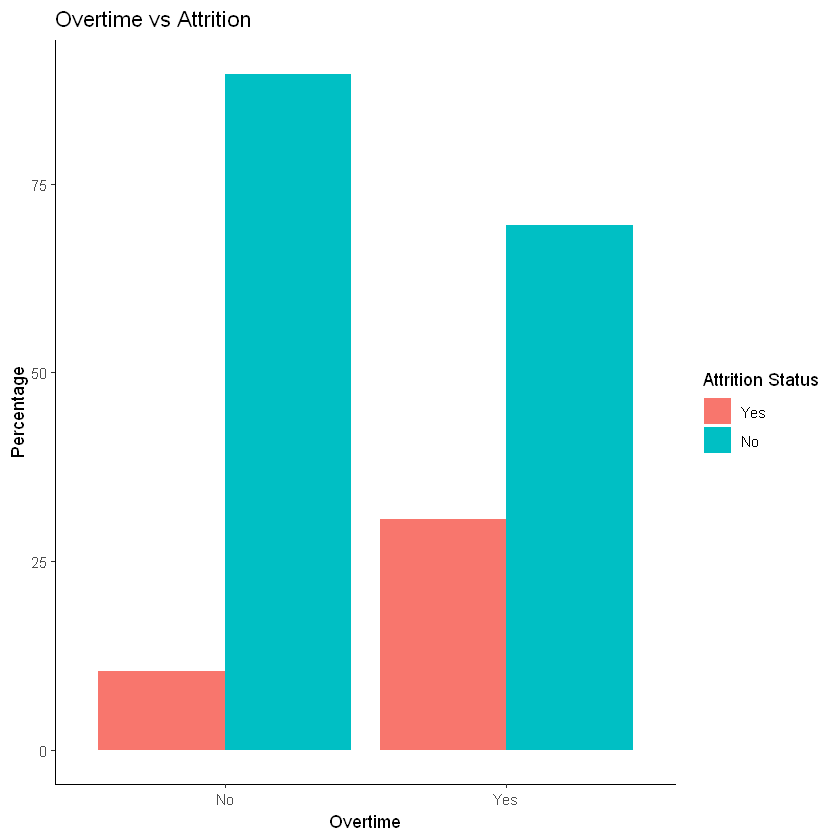

In [18]:
# 2. Overtime vs attrition
hr_cleaned |>
  
  ## Group by overtime and attrition
  group_by(OverTime, Attrition) |>
  
  ## Count the observations in each group
  summarise(Count = n(), .groups = "drop") |>
  
  ## Group by overtime
  group_by(OverTime) |>
  
  ## Compute percentage
  mutate(Percent = Count / sum(Count) * 100) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = OverTime,
             y = Percent,
             fill = Attrition)) +
  
  ## Call count plot
  geom_col(position = "dodge") +
  
  ## Add text elements
  labs(title = "Overtime vs Attrition",
       x = "Overtime",
       y = "Percentage",
       fill = "Attrition Status") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Change theme to classic for easy viewing
  theme_classic()

Comments:
- In both overtime conditions, there were more people who stayed than who left.
- The attrition rate was significantly higher in the overtime condition than in the no-overtime condition.
- Conversely, the percentage of those who stayed was higher in no-overtime condition than in the overtime condition.
- This suggests that overtime contributes to attrition.

#### 3.2.3 Factor 3 – Environment Satisfaction

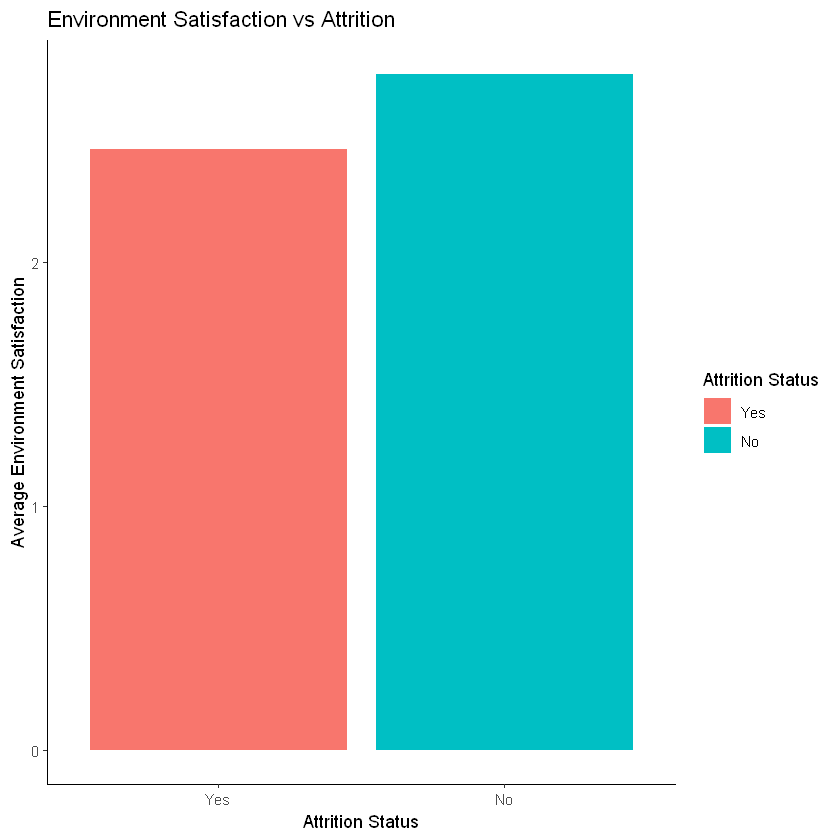

In [19]:
# 3. Environment satisfaction vs attrition
hr_cleaned |>
  
  ## Group by attrition
  group_by(Attrition) |>
  
  ## Compute mean environment satisfaction
  summarise(AVGEnvSat = mean(EnvironmentSatisfaction)) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Attrition,
             y = AVGEnvSat,
             fill = Attrition)) +
  
  ## Call bar plot
  geom_col() +
  
  ## Add text elements
  labs(title = "Environment Satisfaction vs Attrition",
       x = "Attrition Status",
       y = "Average Environment Satisfaction",
       fill = "Attrition Status") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Change theme to classic for easy viewing
  theme_classic()

Comment: It is not clear whether there is a significant difference between the attrition groups.

In [20]:
# Conduct an independent t-test to test the difference
t.test(EnvironmentSatisfaction ~ Attrition, data = hr_cleaned)


	Welch Two Sample t-test

data:  EnvironmentSatisfaction by Attrition
t = -3.7513, df = 316.62, p-value = 0.0002092
alternative hypothesis: true difference in means between group Yes and group No is not equal to 0
95 percent confidence interval:
 -0.468253 -0.146056
sample estimates:
mean in group Yes  mean in group No 
         2.464135          2.771290 


In [21]:
# Check the effect size
cohen.d(EnvironmentSatisfaction ~ Attrition, data = hr_cleaned)


Cohen's d

d estimate: -0.2824158 (small)
95 percent confidence interval:
     lower      upper 
-0.4219167 -0.1429148 


Comments:
- While there is a statistically significant difference in environment satisfaction between the attrition groups (t = -3.75, p < .001), its magnitude is small.
- This suggests that while environment satisfaction may play a role in attrition, its influence may not be as importance as other factors such as monthly income and overtime.

### 3.3 Part III – Attrition by Department & Job Role

#### 3.3.1 Attrition by Department

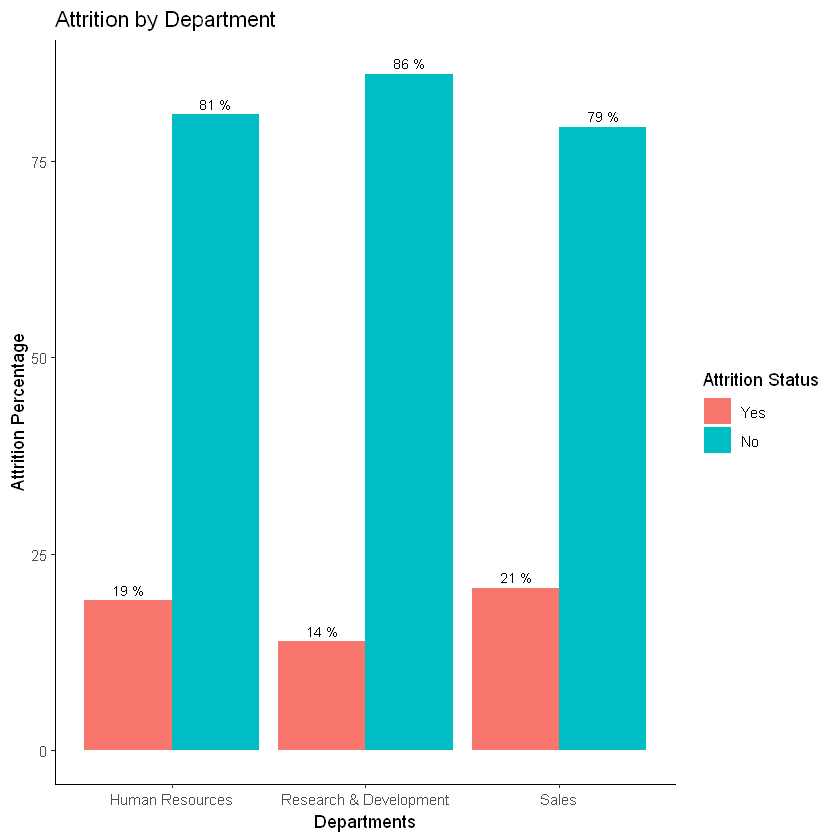

In [22]:
# Attrition by department
hr_cleaned |>
  
  ## Group by department and attrition
  group_by(Department, Attrition) |>
  
  ## Count the number of observations
  summarise(Count = n(), .groups = "drop") |>
  
  ## Group by department
  group_by(Department) |>
  
  ## Compute percentage
  mutate(Percent = Count / sum(Count) * 100) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Department,
             y = Percent,
             fill = Attrition)) +
  
  ## Call on bar plot
  geom_col(position = "dodge") +
  
  ## Add percent text
  geom_text(aes(label = paste(round(Percent, 0), "%")),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3) +
  
  ## Add text elements
  labs(title = "Attrition by Department",
       x = "Departments",
       y = "Attrition Percentage",
       fill = "Attrition Status") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Adjust theme to classic for easy viewing
  theme_classic()

Comments:
- All departments have a similar percentage of people leaving and staying.
- Notably, however, R&D has a lower percent of people leaving and a slightly higher percentage of people staying compared to the other departments.
- Additionally, Sales has the highest percentage of people leaving and lowest percetage of people staying. This suggests that the attrition may have the most impact in Sales.

#### 3.3.2 Attrition by Job Role

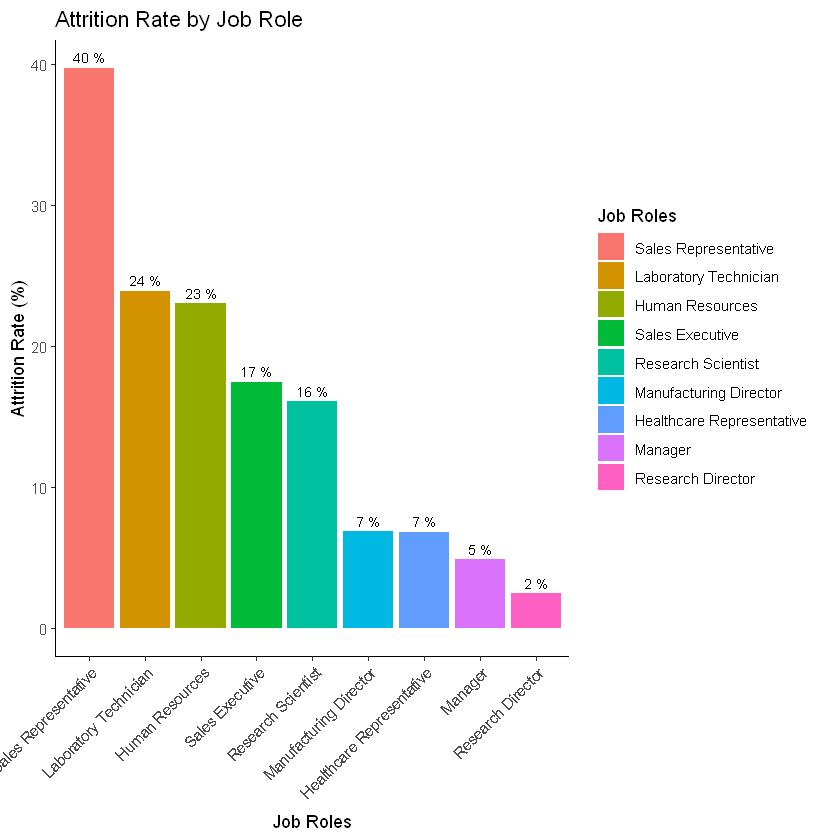

In [27]:
# Attrition by job role
hr_cleaned |>
  
  ## Group by department and attrition
  group_by(JobRole) |>
  
  ## Count the number of observations
  summarise(AttritionRate = mean(Attrition == "Yes") * 100) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Reorder job role levels
  mutate(JobRole = fct_reorder(JobRole,
                               AttritionRate,
                               .desc = TRUE)) |>
  
  ## Aesthetic mapping
  ggplot(aes(x = JobRole,
             y = AttritionRate,
             fill = JobRole)) +
  
  ## Call on bar plot
  geom_col() +
  
  ## Add percent text
  geom_text(aes(label = paste(round(AttritionRate, 0), "%")),
            vjust = -0.5,
            size = 3) +
  
  ## Add text elements
  labs(title = "Attrition Rate by Job Role",
       x = "Job Roles",
       y = "Attrition Rate (%)",
       fill = "Job Roles") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Adjust theme to classic for easy viewing
  theme_classic() +
  
  ## Adjust text elements
  theme(axis.text.x = element_text(angle = 45,
                                   hjust = 1))

Comments:
- The Sales Rep role has the highest percentage of attrition.
- The Research Director role has the lowest percentage of attrition.
- Given the job role titles, employees in lower job levels appear to leave more often.

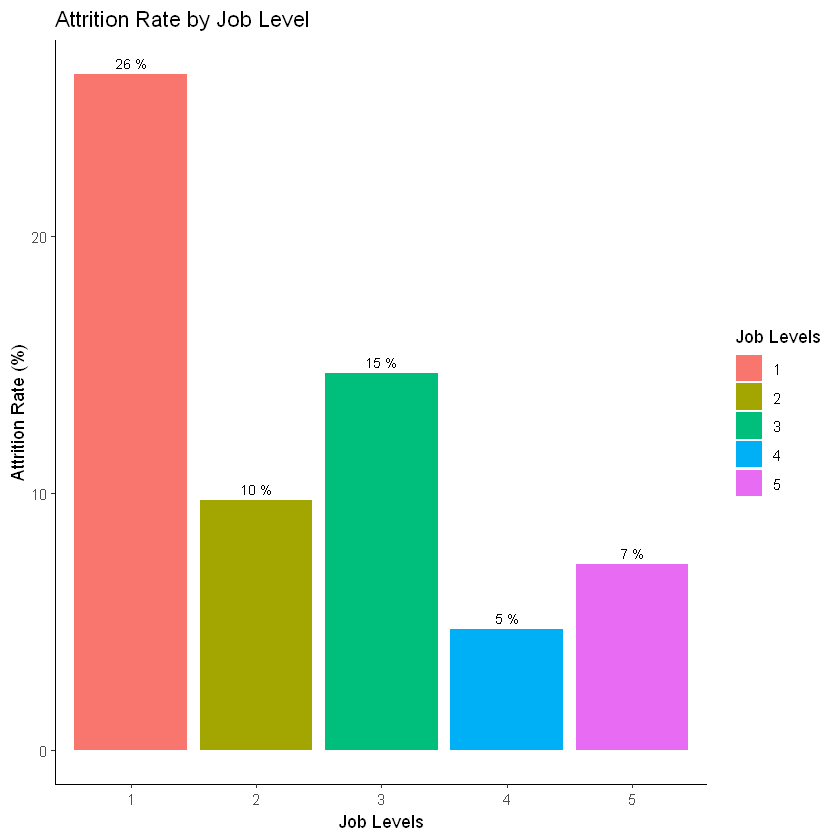

In [24]:
# Confirm whether job level is associated with attrition
hr_cleaned |>
  
  ## Group by job levels
  group_by(JobLevel) |>
  
  ## Compute attrition rate
  summarise(AttritionRate = mean(Attrition == "Yes") * 100) |>
  
  ## Ungroup
  ungroup() |>

  ## Aesthetic mapping
  ggplot(aes(x = JobLevel,
             y = AttritionRate,
             fill = JobLevel)) +
  
  ## Call on bar plot
  geom_col() +
  
  ## Add percent text
  geom_text(aes(label = paste(round(AttritionRate, 0), "%")),
            vjust = -0.5,
            size = 3) +
  
  ## Add text elements
  labs(title = "Attrition Rate by Job Level",
       x = "Job Levels",
       y = "Attrition Rate (%)",
       fill = "Job Levels") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Adjust theme to classic for easy viewing
  theme_classic()

Comments:
- Job level 1 has the highest attrition percentage, while job levels 4 and 5 have the lowest attrition percentages.
- This supports the earlier notion that employees in lower job levels are more likely to leave the company.

### 3.4 Part IV – Attrition by Gender & Age

#### 3.4.1 Attrition by Gender

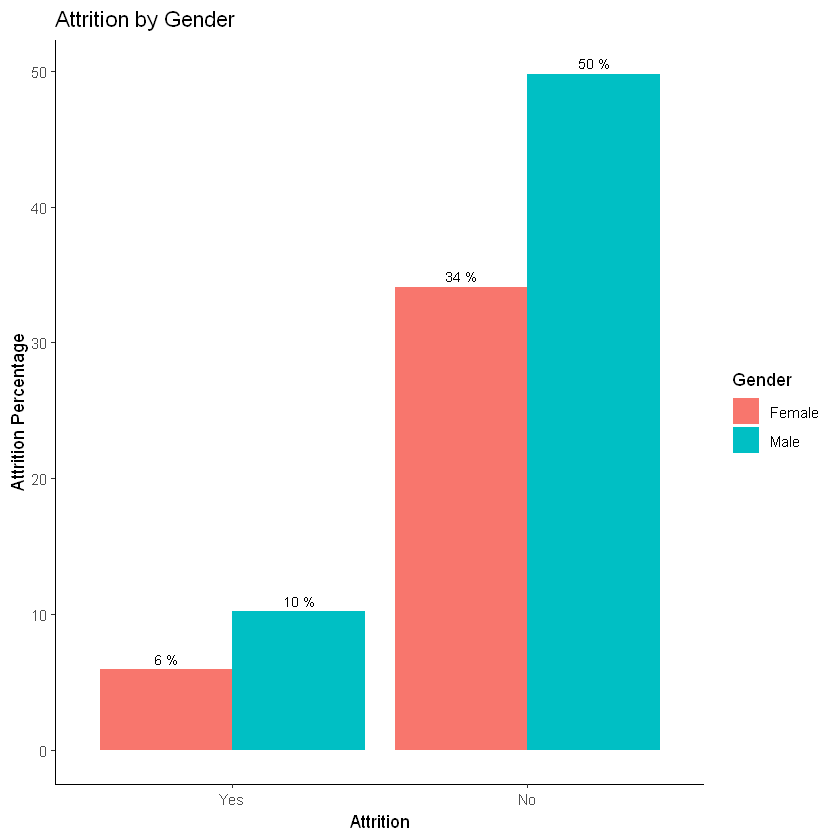

In [26]:
# Gender vs attrition
hr_cleaned |>
  
  ## Group by gender and attritiom
  group_by(Gender, Attrition) |>
  
  ## Count the number of observations
  summarise(Count = n(), .groups = "drop") |>
  
  ## Group by gender
  mutate(Percent = Count / sum(Count) * 100) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Attrition,
             y = Percent,
             fill = Gender)) +
  
  ## Call on bar plot
  geom_col(position = "dodge") +
  
  ## Add percent text
  geom_text(aes(label = paste(round(Percent, 0), "%")),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3) +
  
  ## Add text elements
  labs(title = "Attrition by Gender",
       x = "Attrition",
       y = "Attrition Percentage",
       fill = "Gender") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Adjust theme to classic for easy viewing
  theme_classic()

Comments:
- In both attrition conditions, there were more males than females.
- Among both genders, more people left than stayed.
- Since the attrition patterns are similar across genders, this variable may contribute weakly to attrition.

#### 3.4.2 Attrition by Age

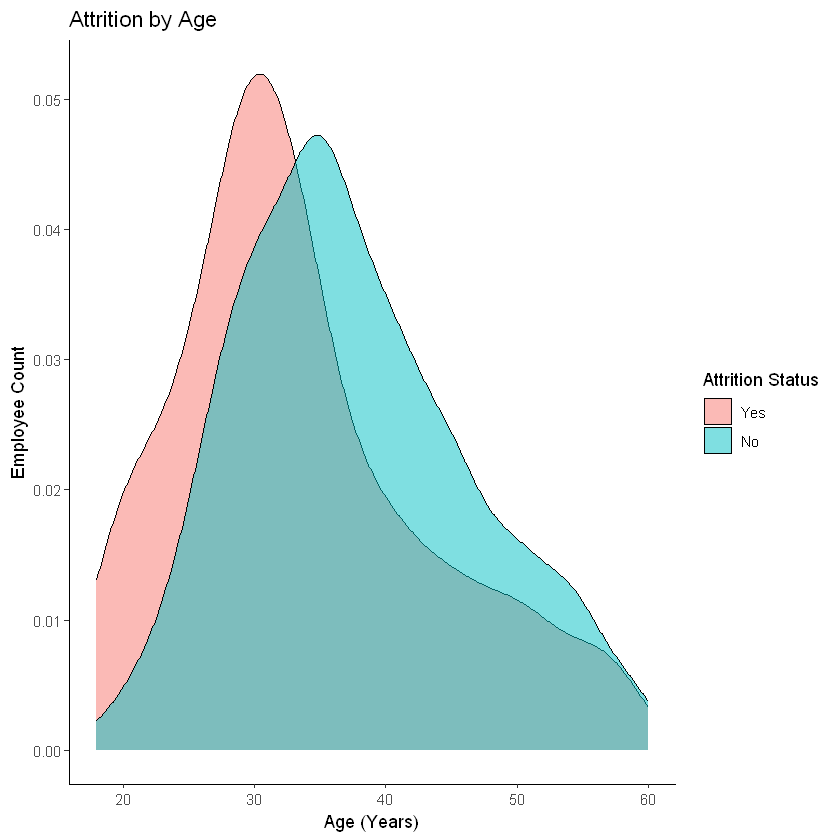

In [25]:
# Age vs attrition

hr_cleaned |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Age,
             fill = Attrition)) +
  
  ## Call on density plot
  geom_density(alpha = 0.5) +
  
  ## Add text elements
  labs(title = "Attrition by Age",
       x = "Age (Years)",
       y = "Employee Count",
       fill = "Attrition Status") +
  
  ## Adjust theme to classic for easy viewing
  theme_classic()

Comments:
- The age distributions are similar across attrition conditions.
- The age distribution for those who stayed is more normally distributed.
- The peaks are close together.
- As the peak for those who left leans more towards the left, it suggests that people who left tend to be younger.
- This suggests that age may be a worthwhile predictor of attrition.

# 4. Building a Machine Learning Model

# 5. Summary & Recommendations